In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as pltimport 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('KiranaPasal_Data.csv', index_col='Date', parse_dates=True)



In [15]:
df.info() , df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2081-01-01 to 2082-12-31
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sales               730 non-null    int64  
 1   Festival_Indicator  730 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.1 KB


(None,
             Sales  Festival_Indicator
 Date                                 
 2081-01-01  23904                 0.0
 2081-01-02  31138                 0.0
 2081-01-03  19682                 0.0
 2081-01-04  20632                 0.0
 2081-01-05  18692                 0.0)

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define SARIMAX model (simple order, will tune later)
model = SARIMAX(train['Sales'], 
                exog=train[['Festival_Indicator']], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)

# Fit the model
sarimax_model = model.fit(disp=False)

# Summary of the model
sarimax_model.summary()


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5597.543
Date:                            Thu, 13 Feb 2025   AIC                          11207.085
Time:                                    17:09:29   BIC                          11233.021
Sample:                                01-01-2081   HQIC                         11217.215
                                     - 08-07-2082                                         
Covariance Type:                              opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Festival_Indicator  2.329e+04    718.403     32.423      0.000    2.19e+04    2.47e+04
ar.L1                  0.0190      0.042      0.449      0.653      -0.064       0.102
ma.L1                 -0.9616      0.016    -59.207      0.000      -0.993      -0.930
ar.S.L12              -0.0384      0.046     -0.840      0.401      -0.128       0.051
ma.S.L12              -0.9321      0.021    -43.434      0.000      -0.974      -0.890
sigma2              2.997e+07      0.194   1.54e+08      0.000       3e+07       3e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                35.27
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.43
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.56e+22. Standard errors may be unstable.
"""

In [12]:
# Define the SARIMA model
data = data['Sales']
model = sm.tsa.SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
sarima_fit = model.fit(disp=0)
# Print summary of the model
print(sarima_fit.summary())

KeyError: 'Sales'

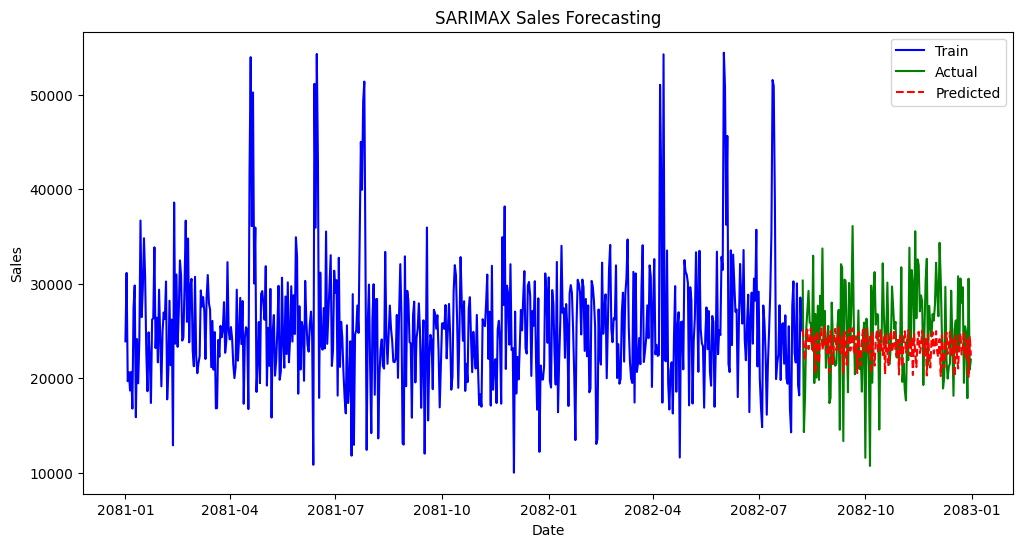

In [19]:
import matplotlib.pyplot as plt

# Make predictions
predictions = sarimax_model.predict(start=test.index[0], end=test.index[-1], exog=test[['Festival_Indicator']], dynamic=False)

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train', color='blue')
plt.plot(test.index, test['Sales'], label='Actual', color='green')
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='dashed')
plt.legend()
plt.title("SARIMAX Sales Forecasting")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


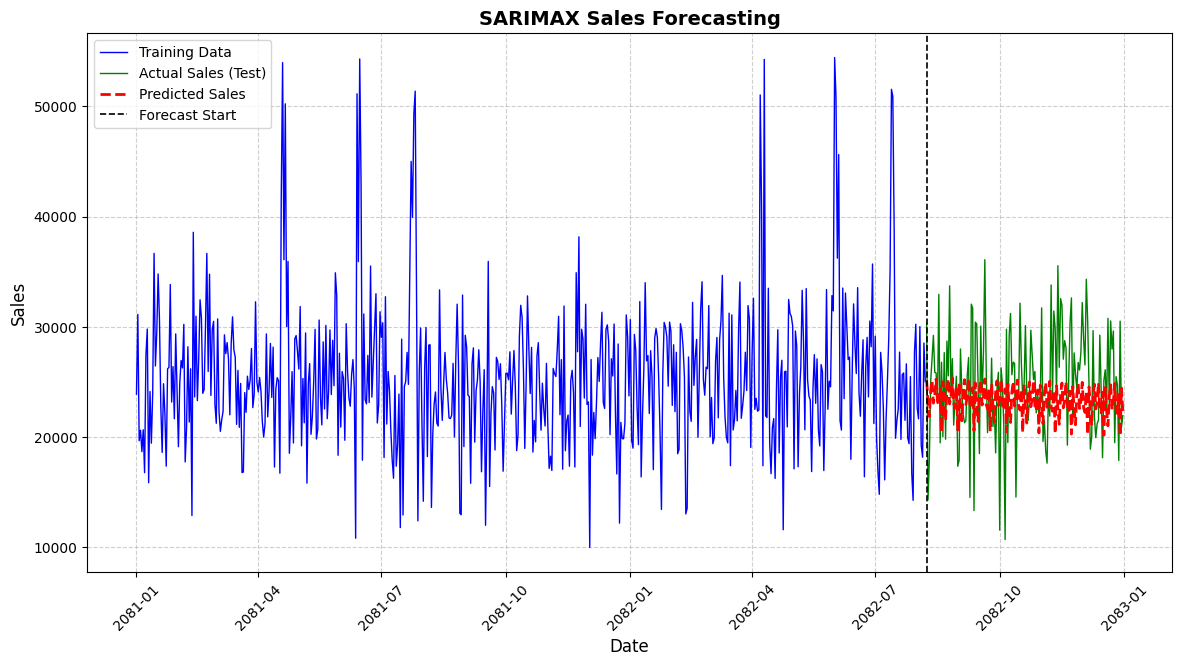

In [20]:
import matplotlib.pyplot as plt

# Make predictions
predictions = sarimax_model.predict(
    start=test.index[0], 
    end=test.index[-1], 
    exog=test[['Festival_Indicator']], 
    dynamic=False
)

# Create figure
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train.index, train['Sales'], label='Training Data', color='blue', linewidth=1)

# Plot actual test data
plt.plot(test.index, test['Sales'], label='Actual Sales (Test)', color='green', linewidth=1)

# Plot predicted data
plt.plot(test.index, predictions, label='Predicted Sales', color='red', linestyle='dashed', linewidth=2)

# Add vertical line to mark transition from training to testing
plt.axvline(x=test.index[0], color='black', linestyle='--', linewidth=1.2, label="Forecast Start")

# Titles and labels
plt.title("SARIMAX Sales Forecasting", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.legend(loc='upper left', fontsize=10)  # Move legend for clarity
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better visualization

# Show plot
plt.show()


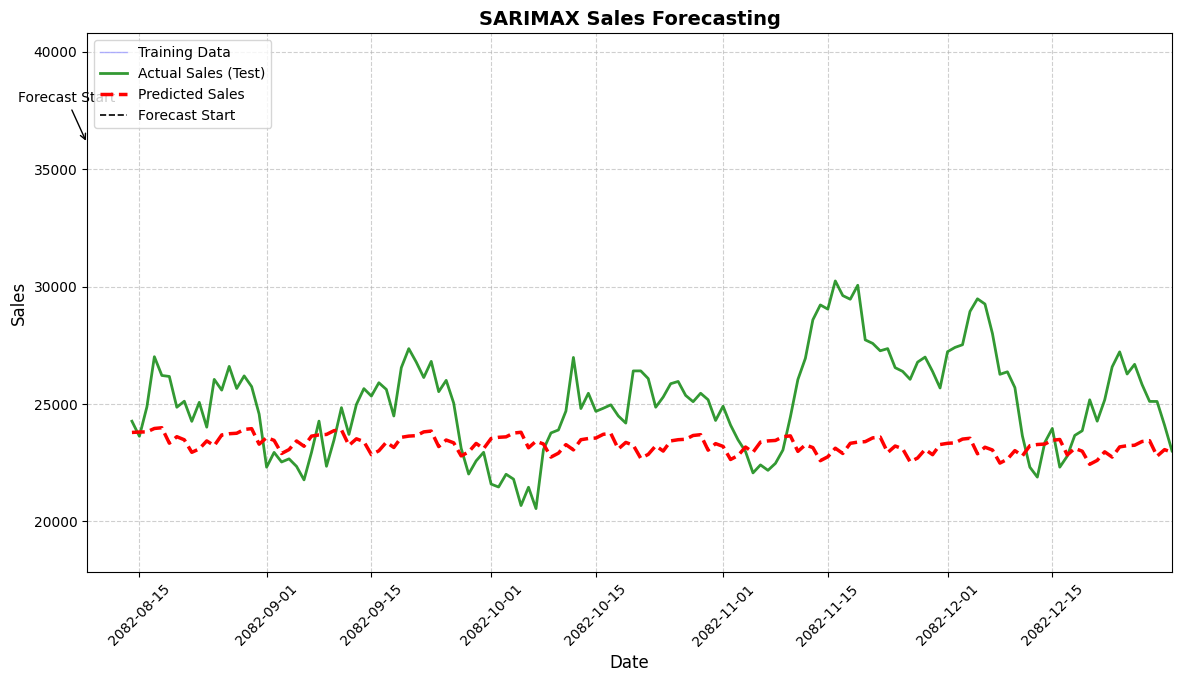

In [ ]:
import matplotlib.pyplot as plt

# Apply smoothing for better visualization
train_smooth = train['Sales'].rolling(window=7).mean()
test_smooth = test['Sales'].rolling(window=7).mean()
pred_smooth = predictions.rolling(window=7).mean()

# Create figure
plt.figure(figsize=(14, 7))

# Plot training data (faded)
plt.plot(train.index, train_smooth, label='Training Data', color='blue', alpha=0.3, linewidth=1)

# Plot actual test data (bold)
plt.plot(test.index, test_smooth, label='Actual Sales (Test)', color='green', alpha=0.8, linewidth=2)

# Plot predicted data (bold & dashed)
plt.plot(test.index, pred_smooth, label='Predicted Sales', color='red', linestyle='dashed', linewidth=2.5)

# Add confidence interval if available
# plt.fill_between(test.index, lower_bound, upper_bound, color='red', alpha=0.2, label='Prediction Interval')

# Add vertical line to mark transition from training to testing
plt.axvline(x=test.index[0], color='black', linestyle='--', linewidth=1.2, label="Forecast Start")

# Annotate forecast start
plt.annotate("Forecast Start", xy=(test.index[0], test['Sales'].max()), 
             xytext=(-50, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", color='black'))

# Titles and labels
plt.title("SARIMAX Sales Forecasting", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.legend(loc='upper left', fontsize=10)  # Move legend for clarity
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better visualization

# Zoom in on forecast period
plt.xlim(test.index[0], test.index[-1])

# Show plot
plt.show()
